# Data Visualization


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
url = "https://raw.githubusercontent.com/DmitryPavlyuk/python-da/main/week5/data/bikes.csv"
url2 = "https://raw.githubusercontent.com/DmitryPavlyuk/python-da/main/week5/data/bikes_test.csv"
bikes = pd.read_csv(url)
bikes2 = pd.read_csv(url2)
bikes = pd.concat([bikes,bikes2])
bikes.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,01/01/2011 00:00,spring,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,01/01/2011 01:00,spring,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,01/01/2011 02:00,spring,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,01/01/2011 03:00,spring,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,01/01/2011 04:00,spring,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [4]:
bikes["datetime"] = pd.to_datetime(bikes["datetime"], format='%d/%m/%Y %H:%M')
bikes["season"] = bikes["season"].astype('category')
bikes["weather"] = bikes["weather"].astype('category')
bikes["holiday"] = bikes["holiday"].astype('category')
bikes["workingday"] = bikes["workingday"].astype('category')
bikes["humidity"] = bikes["humidity"].astype(float)
bikes.dtypes

datetime      datetime64[ns]
season              category
holiday             category
workingday          category
weather             category
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual               float64
registered           float64
count                float64
dtype: object

Panda graph types
- Histogram
- desity plots
- box plots
- scatter plots
- bar plots
- pie charts
- line plots
- area plots

<AxesSubplot:ylabel='Frequency'>

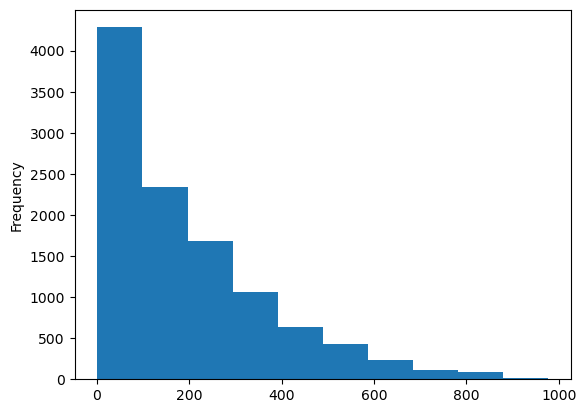

In [5]:
bikes["count"].plot.hist()

Matplotlib graph types
- advanded layouts
- full control over presentation

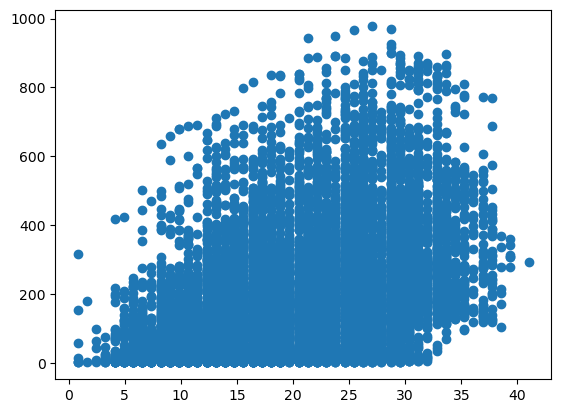

In [6]:
figure, axis = plt.subplots()
axis.scatter(x=bikes['temp'], y=bikes['count'])
plt.show()

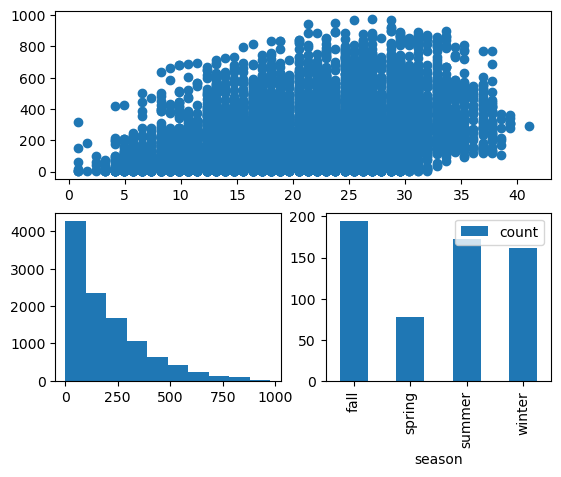

In [7]:
from matplotlib.gridspec import GridSpec
fig = plt.figure()
gs = GridSpec(2, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, :])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[1, 1])
ax1.scatter(x=bikes['temp'], y=bikes['count'])
ax2.hist(bikes['count'])
bikes.groupby("season").agg({'count':'median'}).plot.bar(ax=ax3)
plt.show()

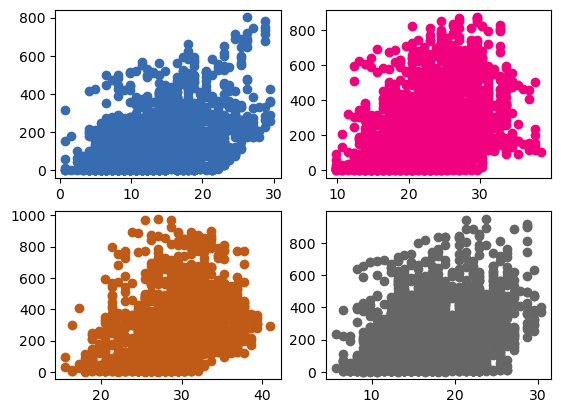

In [8]:
figure, axis = plt.subplots(2, 2)
axis = axis.flatten()
i = 0
for season in bikes['season'].unique():
    axis[i].scatter(x=bikes.loc[bikes['season']==season,'temp'],
                    y=bikes.loc[bikes['season']==season,'count'],
                    color=plt.cm.Accent.colors[i+4])
    i+=1
plt.show()

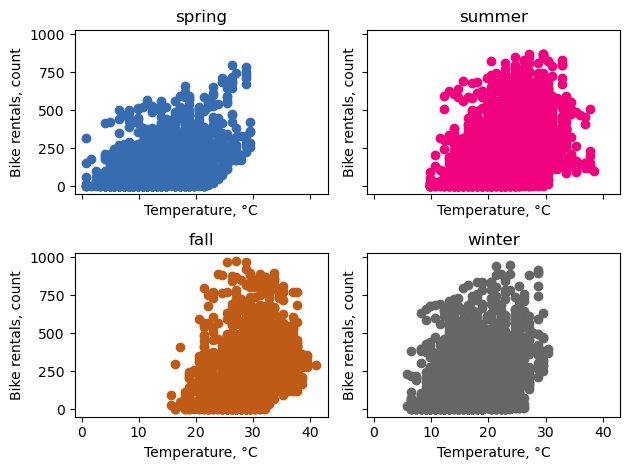

In [9]:
deg = u'\N{DEGREE SIGN}'

figure, axis = plt.subplots(2, 2, sharex=True, sharey=True)
axis = axis.flatten()
i = 0
for season in bikes['season'].unique():
    axis[i].scatter(x=bikes.loc[bikes['season']==season,'temp'],
                    y=bikes.loc[bikes['season']==season,'count'],
                    color=plt.cm.Accent.colors[i+4])
    axis[i].set_title(season)
    axis[i].set_xlabel("Temperature, "+deg+"C")
    axis[i].set_ylabel("Bike rentals, count")
    i+=1
figure.tight_layout()
plt.show()

In [10]:
def make_plot():
    figure, axis = plt.subplots(figsize=(12, 5))
    for season in bikes['season'].unique():
        axis.scatter(x=bikes.loc[bikes['season']==season,'temp'],
                     y=bikes.loc[bikes['season']==season,'count'],
                     label=season, cmap=plt.cm.Accent)
    axis.set_title("Bike rentals vs. Temperature") #Title
    axis.set_xlabel("Temperature, "+deg+"C") # X axis' label
    axis.set_ylabel("Bike rentals, count") # Y axis' label
    axis.set_ylim([0,1200]) # Y axis' limits
    axis.set_xlim([0,45]) # X axis' limits
    startx, endx = axis.get_xlim()
    start, end = axis.get_ylim()
    axis.xaxis.set_ticks(np.arange(startx, endx, 10)) # Sequence of X ticks
    axis.yaxis.set_ticks(np.arange(start, end, 400)) # Sequence of Y ticks

    axis.tick_params(axis='x',
                     labelrotation=45,
                     color='red',
                     labelcolor='blue',
                     grid_color="red",
                     grid_alpha=0.5) # X axis' tick format
    axis.get_yticklabels()[1].set_color('red') # Individual X axis' tick format
    axis.legend(loc='upper left'); # Legend
    plt.grid() # Show grid

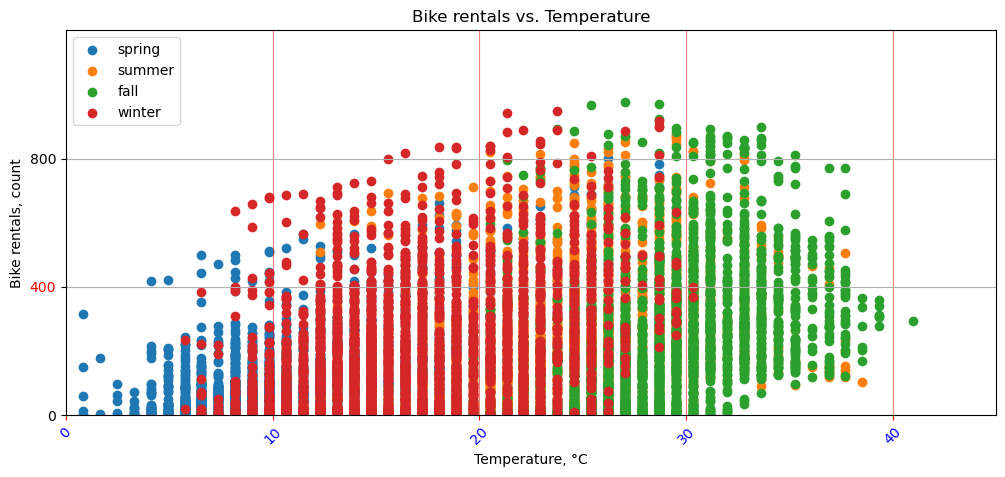

In [11]:
make_plot()

In [12]:
bikes_weekly = bikes.set_index('datetime').resample('W').\
    agg({'temp':'mean', 'humidity':'mean'}).reset_index()

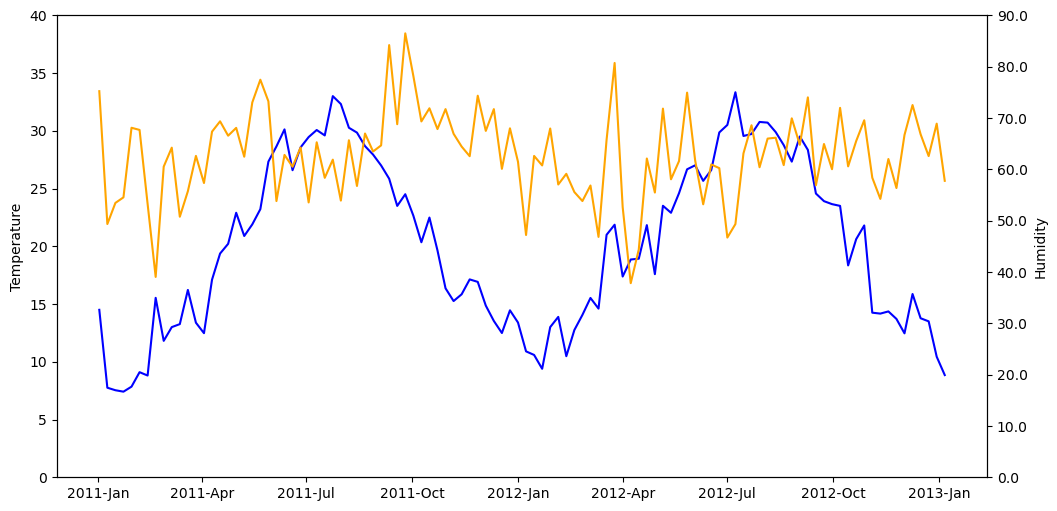

In [13]:
from matplotlib.dates import DateFormatter

figure, axis = plt.subplots(figsize=(12,6))
ax2 = axis.twinx()
axis.plot(bikes_weekly['datetime'], bikes_weekly['temp'], c="blue")
axis.set_ylim([0,40])
axis.set_ylabel("Temperature")
ax2.plot(bikes_weekly['datetime'], bikes_weekly['humidity'], c="orange")
ax2.set_ylim([0,90])
ax2.set_ylabel("Humidity")
ax2.yaxis.set_major_formatter(plt.FuncFormatter(lambda x,pos : f"{x:.1f}"))
axis.xaxis.set_major_formatter(DateFormatter('%Y-%b'))
plt.show()

In [14]:
bikes_3D = bikes.groupby([bikes['datetime'].dt.weekday,bikes['datetime'].dt.hour]).agg({'count':'median'})
bikes_3D.index.names = ["weekday","hour"]
bikes_3D = bikes_3D.reset_index().pivot(index=['hour'],columns=['weekday'], values='count').astype(float)
bikes_3D.T

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
weekday,,,,,,,,,,,,,,,,,,,,,
0,30.0,13.0,8.0,4.0,5.0,23.0,94.0,268.0,417.0,219.0,...,185.0,196.0,298.0,528.0,518.0,372.0,240.0,177.0,116.0,63.0
1,26.0,11.0,5.0,3.0,5.0,22.0,108.5,311.5,462.5,219.5,...,159.0,178.0,292.0,569.0,538.0,365.0,268.0,195.0,137.0,73.0
2,33.0,12.0,5.0,4.0,4.0,27.0,112.0,312.0,487.0,225.0,...,163.0,176.0,277.0,517.0,489.0,347.0,256.0,189.0,129.0,70.0
3,34.0,15.0,7.0,4.0,5.0,26.0,112.0,304.0,484.0,227.0,...,180.0,180.0,294.0,563.0,523.0,364.0,258.0,195.0,149.0,97.0
4,54.5,23.0,11.0,6.0,5.0,24.0,87.5,248.0,454.0,244.5,...,215.5,233.5,338.5,510.5,424.0,293.0,215.5,164.5,148.5,119.5
5,95.0,70.5,51.0,23.0,7.0,8.0,20.5,46.5,118.5,207.0,...,389.0,393.5,399.0,347.0,297.0,248.0,181.5,165.0,146.5,124.0
6,99.5,77.5,66.0,28.0,9.5,8.0,15.0,34.5,87.0,169.0,...,355.0,356.5,353.0,326.0,254.5,227.5,175.0,132.0,95.5,54.5


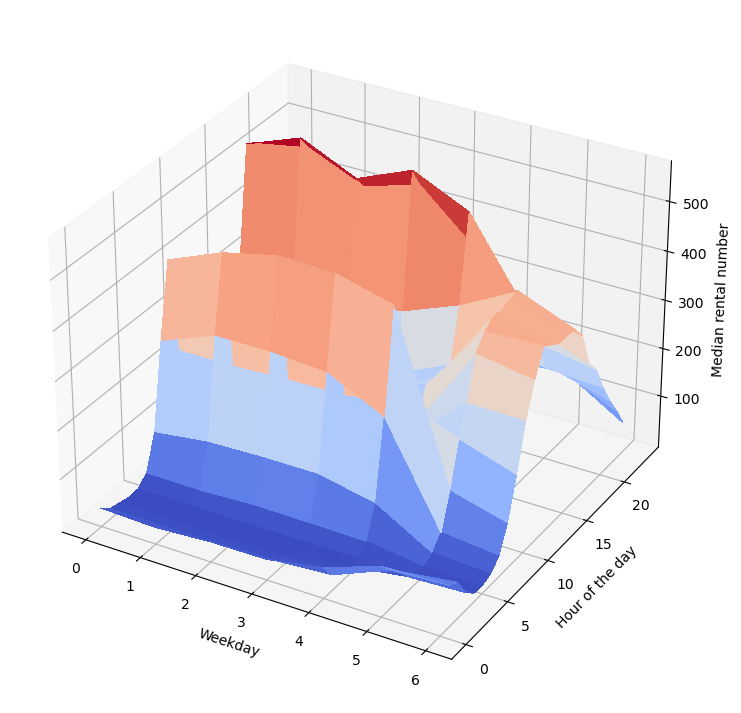

In [15]:
figure, axis = plt.subplots(subplot_kw={"projection": "3d"},figsize=(9,9))
X, Y = np.meshgrid(bikes_3D.columns, bikes_3D.index)
surf = axis.plot_surface(X, Y, bikes_3D, cmap=plt.cm.coolwarm, linewidth=0, antialiased=False)
axis.set_ylabel("Hour of the day")
axis.set_xlabel("Weekday")
axis.set_zlabel("Median rental number")
plt.show()


Seaborn

Similar to plt but without the loops
- accent palette
- colorbline palette
- histogram + density
- facet grid
- violin plot
- heatmap
- lines instead of scatter
- linear regression


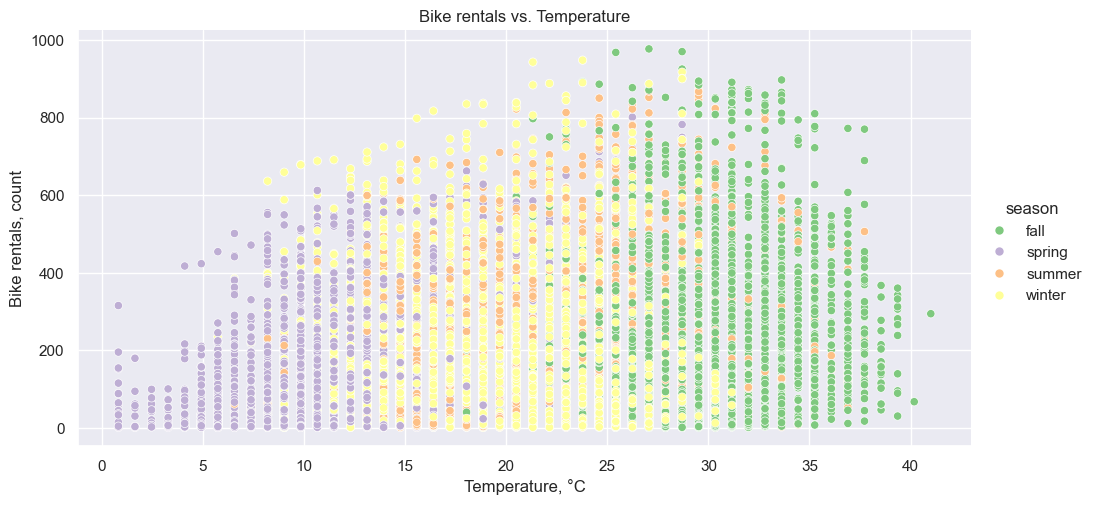

In [16]:
sns.set(rc={'figure.dpi':100, 'figure.figsize':(6,4)})
sns.set(style="darkgrid", palette="Accent")
ax = sns.relplot(data = bikes, x='temp', y='count', kind="scatter", hue="season", aspect=2)
ax.set(xlabel = "Temperature, "+deg+"C", ylabel = 'Bike rentals, count', title="Bike rentals vs. Temperature");

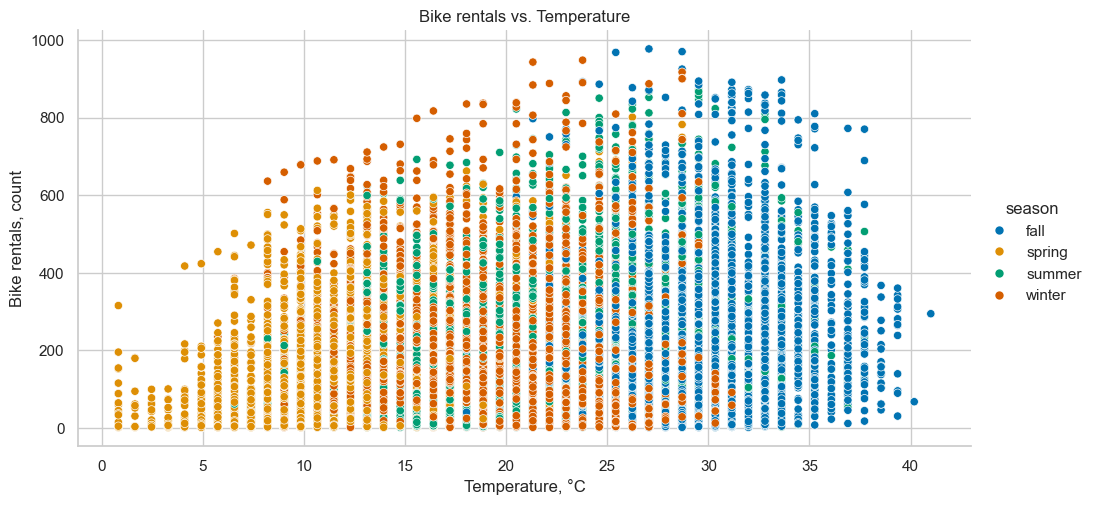

In [17]:
sns.set(style="whitegrid", palette="colorblind")
ax = sns.relplot(data = bikes, x='temp', y='count', kind="scatter", hue="season", aspect=2)
ax.set(xlabel = "Temperature, "+deg+"C", ylabel = 'Bike rentals, count', title="Bike rentals vs. Temperature");


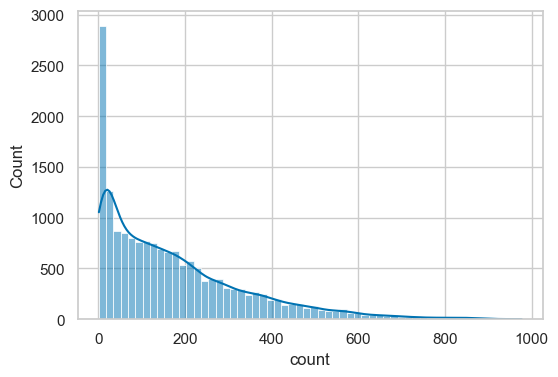

In [19]:
sns.histplot(data=bikes, x='count', kde=True);

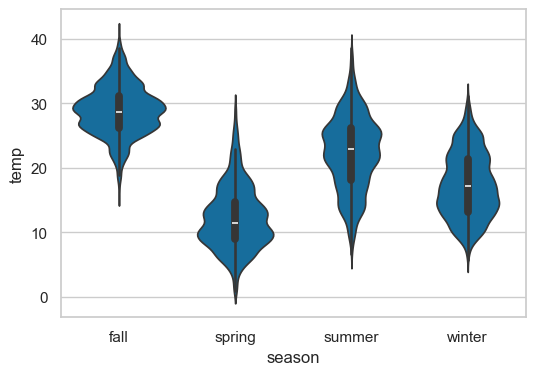

In [21]:
sns.violinplot(data=bikes, y='temp', x='season');

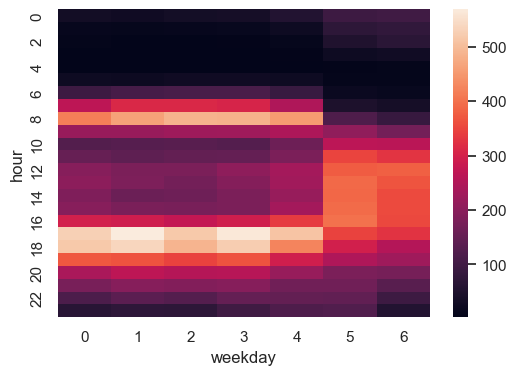

In [25]:
sns.heatmap(bikes_3D);

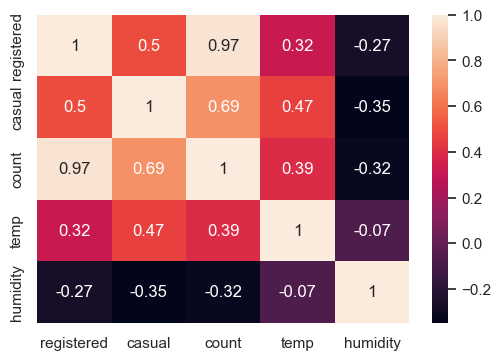

In [26]:
sns.heatmap(bikes[['registered','casual','count','temp','humidity']].corr(), annot=True);

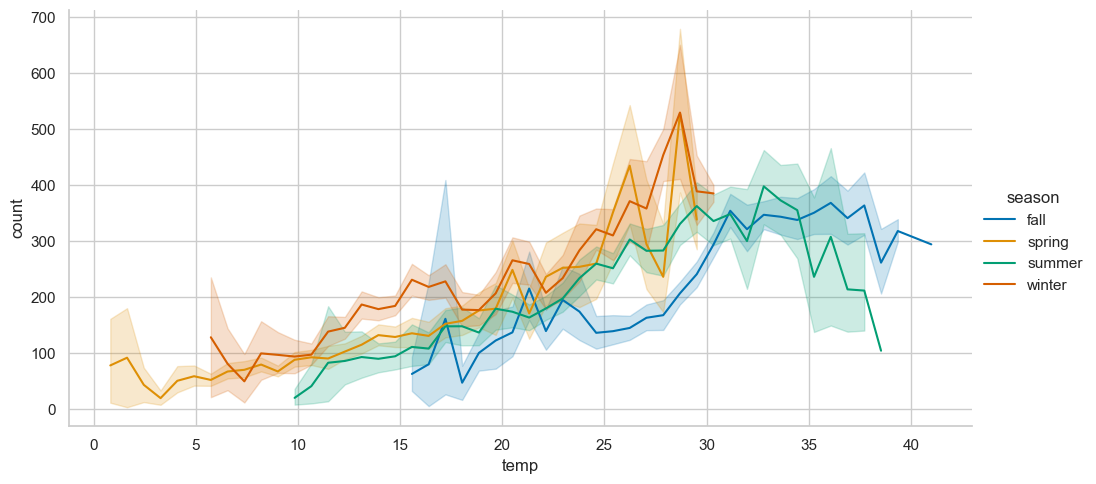

In [28]:
sns.relplot(data = bikes.dropna(), x='temp', y='count', kind="line", hue="season", aspect=2);

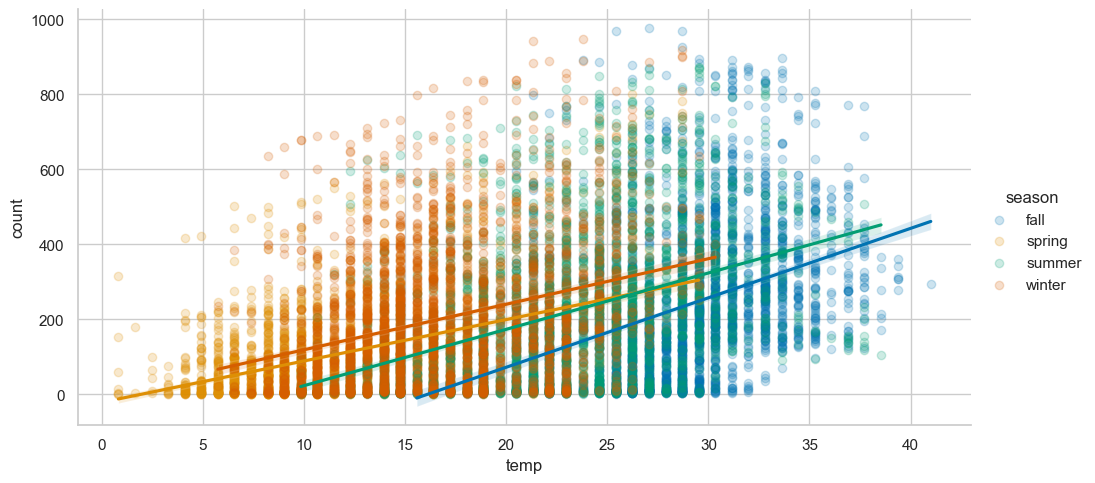

In [29]:
sns.lmplot(data=bikes, x='temp', y='count', hue="season",aspect=2,  scatter_kws={'alpha':0.2});
